<a href="https://colab.research.google.com/github/gomes-ti23/Projeto_Python/blob/main/Projeto_Analisando_Gmail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import mailbox
import pytz

#**Carregando os Dados**


In [3]:
!unzip /content/drive/MyDrive/takeout-20241210T021841Z-001.zip

Archive:  /content/drive/MyDrive/takeout-20241210T021841Z-001.zip
  inflating: Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox  
  inflating: Takeout/navegador_arquivo.html  


In [4]:
# Carregando o arquivo
mbox = mailbox.mbox('/content/Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox')

In [5]:
# Visualizando as chaves
mbox[0].keys()

['X-GM-THRID',
 'X-Gmail-Labels',
 'Delivered-To',
 'Received',
 'X-Google-Smtp-Source',
 'X-Received',
 'ARC-Seal',
 'ARC-Message-Signature',
 'ARC-Authentication-Results',
 'Return-Path',
 'Received',
 'Received-SPF',
 'Authentication-Results',
 'DKIM-Signature',
 'DKIM-Signature',
 'Received',
 'From',
 'To',
 'Subject',
 'Date',
 'List-Unsubscribe',
 'List-Unsubscribe-Post',
 'MIME-Version',
 'Reply-To',
 'X-SFMC-Stack',
 'x-job',
 'Message-ID',
 'Feedback-ID',
 'Content-Type']

# Criando um DataFrame
*Para que trabalhar da melhor maneira, vou extrair os mesmos dados, salvá-los em um dicionário e construir com ele um dataframe.*

In [6]:
# Criando o dicionário
email_dict = {
    'date': [],
    'from': [],
    'to': [],
    'subject': [],
    'labels': []
}

# Coletando os dados
for message in mbox:
  email_dict['date'].append(message['date'])
  email_dict['from'].append(message['from'])
  email_dict['to'].append(message['to'])
  email_dict['subject'].append(message['subject'])
  email_dict['labels'].append(message['X-Gmail-Labels'])

In [7]:
# Transformando em dataframe
df = pd.DataFrame(email_dict)

In [8]:
# Visualizando o dataframe
df.head()

,date,from,to,subject,labels
0,"Mon, 09 Dec 2024 10:38:49 -0600","""Banco PAN"" <reply@pan.com.vc>",<tigomesg23@gmail.com>,=?UTF-8?B?RXN0YSBkYXRhIHBlZGUgdW1hIGNvbWVtb3Jh...,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5..."
1,"Mon, 09 Dec 2024 10:00:49 +0000 (UTC)",Paulo Vasconcellos <newsletter@mail.datahacker...,"""tigomesg23@gmail.com"" <tigomesg23@gmail.com>",Aprendendo grafos com um cavalo =?UTF-8?B?8J+Q...,"=?UTF-8?Q?Importante,Lixeira,Aberto,Categoria:..."
2,"Sat, 07 Dec 2024 11:24:29 -0800",Google Play <googleplay-noreply@google.com>,tigomesG23@gmail.com,Jogue Jogo de Sorvete do Panda no PC com o Goo...,"=?UTF-8?Q?Importante,Lixeira,Aberto,Categoria:..."
3,"Mon, 9 Dec 2024 21:10:17 +0000 (GMT)",Apple Account <appleaccount@insideapple.apple....,tigomesg23@gmail.com,Mantenha sua Conta Apple protegida e segura,"=?UTF-8?Q?Lixeira,Aberto,Categoria:_atualiza=C..."
4,"Mon, 09 Dec 2024 08:06:46 -0600","""Ticket"" <meuticket@novidades.ticket.com.br>",<tigomesg23@gmail.com>,=?UTF-8?B?RGVsw61jaWFzIGRvIENvY28gQmFtYnUgY29t...,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5..."


In [9]:
# Verificando os tipos
df.dtypes

,0
date,object
from,object
to,object
subject,object
labels,object


*Obsevando os tipos de dados, vou precisar alterar o tipo da coluna 'date'. Já que é uma data.*

Entretanto, a coluna 'date' trás a informação de Time Zones, portanto, é preciso passar o parâmetro utc=True, para que a conversão possa ser feita corretamente.



In [17]:
def arruma_datetime(date_str):
    return pd.to_datetime(date_str,utc=True)
    try:
      return pd.to_datetime(datetime.strptime(date_str, "%d %b %y %H:%M:%S") + pd.DateOffset(hours=-3),utc=True)
    except:
      return pd.NaT

In [18]:
#Utilizando função para arrumar data
df["date"] = df["date"].apply(arruma_datetime)

#Alterando para horário -3, que é o horário do Brasil em relação ao horário mundial.
df["date"] = df["date"].apply(lambda x: x.astimezone(pytz.timezone("America/Sao_Paulo")) if not pd.isnull(x) else pd.NaT)

In [21]:
df.head()

,date,from,to,subject,labels
0,2024-12-09 13:38:49-03:00,"""Banco PAN"" <reply@pan.com.vc>",<tigomesg23@gmail.com>,=?UTF-8?B?RXN0YSBkYXRhIHBlZGUgdW1hIGNvbWVtb3Jh...,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5..."
1,2024-12-09 07:00:49-03:00,Paulo Vasconcellos <newsletter@mail.datahacker...,"""tigomesg23@gmail.com"" <tigomesg23@gmail.com>",Aprendendo grafos com um cavalo =?UTF-8?B?8J+Q...,"=?UTF-8?Q?Importante,Lixeira,Aberto,Categoria:..."
2,2024-12-07 16:24:29-03:00,Google Play <googleplay-noreply@google.com>,tigomesG23@gmail.com,Jogue Jogo de Sorvete do Panda no PC com o Goo...,"=?UTF-8?Q?Importante,Lixeira,Aberto,Categoria:..."
3,2024-12-09 18:10:17-03:00,Apple Account <appleaccount@insideapple.apple....,tigomesg23@gmail.com,Mantenha sua Conta Apple protegida e segura,"=?UTF-8?Q?Lixeira,Aberto,Categoria:_atualiza=C..."
4,2024-12-09 11:06:46-03:00,"""Ticket"" <meuticket@novidades.ticket.com.br>",<tigomesg23@gmail.com>,=?UTF-8?B?RGVsw61jaWFzIGRvIENvY28gQmFtYnUgY29t...,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5..."


In [22]:
# Verificando entradas vazias
df.isnull().sum()

,0
date,0
from,0
to,61
subject,0
labels,53


In [23]:
# Excluindo as linhas, lembrando que estou apagando toda linha que contém "célula" vazia.
df.dropna(how = 'any', inplace = True)

In [24]:
# Verificando novamente
df.isnull().sum()

,0
date,0
from,0
to,0
subject,0
labels,0


# Limpeza de Strings

*Foi notado temos algumas entradas bastante confusas, onde o entendimento do que, de fato, é informação relevante fica comprometido. Portanto é preciso realizar uma limpeza dessas entradas.*

In [39]:
import email.header

In [40]:
def extract_email(header_obj):
    if isinstance(header_obj, str):
        email_match = re.search(r'<(.+?)>', header_obj)
        if email_match:
            return email_match.group(1)
    try:
        decoded_email, encoding = email.header.decode_header(header_obj)[0]
    except (IndexError, TypeError):
        return None

    if isinstance(decoded_email, bytes):
        try:
            return decoded_email.decode(encoding or 'utf-8', errors='replace')
        except LookupError:
            return decoded_email.decode('latin1', errors='replace')
    else:
        return str(decoded_email)

In [41]:
# Aplicando a função
df['to'] = df['to'].apply(extract_email)
df['from'] = df['from'].apply(extract_email)

In [42]:
df.head()

,date,from,to,subject,labels
0,2024-12-09 13:38:49-03:00,reply@pan.com.vc,tigomesg23@gmail.com,=?UTF-8?B?RXN0YSBkYXRhIHBlZGUgdW1hIGNvbWVtb3Jh...,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5..."
1,2024-12-09 07:00:49-03:00,newsletter@mail.datahackers.com.br,tigomesg23@gmail.com,Aprendendo grafos com um cavalo =?UTF-8?B?8J+Q...,"=?UTF-8?Q?Importante,Lixeira,Aberto,Categoria:..."
2,2024-12-07 16:24:29-03:00,googleplay-noreply@google.com,tigomesG23@gmail.com,Jogue Jogo de Sorvete do Panda no PC com o Goo...,"=?UTF-8?Q?Importante,Lixeira,Aberto,Categoria:..."
3,2024-12-09 18:10:17-03:00,appleaccount@insideapple.apple.com,tigomesg23@gmail.com,Mantenha sua Conta Apple protegida e segura,"=?UTF-8?Q?Lixeira,Aberto,Categoria:_atualiza=C..."
4,2024-12-09 11:06:46-03:00,meuticket@novidades.ticket.com.br,tigomesg23@gmail.com,=?UTF-8?B?RGVsw61jaWFzIGRvIENvY28gQmFtYnUgY29t...,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5..."


**Agora vamos limpar a ultima coluna labels, pois ainda está bem confusa**

In [43]:
# Criando a função
def extrair_label(string_labels):
  return string_labels.replace("=?UTF-8?Q?", "").split(",")[0]

In [44]:
df['labels'] = df['labels'].apply(extrair_label)

# Análise Exploratória

*Aqui o interesse é encontrar insights que farão a diferença no projeto*

In [53]:
#Verificando o tipo de labels contidos na coluna
df['labels'].unique()

array(['Lixeira', 'Importante', 'Enviado', 'Caixa de entrada',
       'Caixa_de_entrada', 'Spam', 'Arquivada', 'Categoria:_compras',
       'Categoria:_atualiza=C3=A7=C3=B5es',
       'Categoria:_atualiza=C3=A7=C3=B5es?='], dtype=object)

In [57]:
#Filtrando apenas os 5 primeiros que estão na caixa de entrada
df[df['labels'] == 'Caixa_de_entrada'].head()

,date,from,to,subject,labels
55,2024-11-13 20:00:26-03:00,googleplay-noreply@google.com,tigomesG23@gmail.com,Your trial for Duolingo: Language Lessons will...,Caixa_de_entrada
94,2024-12-04 21:58:08-03:00,no-reply@withpersona.com,tigomesg23@gmail.com,Link =?UTF-8?B?w7puaWNv?= de Coursera,Caixa_de_entrada
134,2024-11-26 23:25:17-03:00,googleplay-noreply@google.com,tigomesG23@gmail.com,=?UTF-8?Q?Seu_teste_de_Duolingo=3A_Language_Le...,Caixa_de_entrada
157,2024-12-08 18:52:44-03:00,no-reply@bancointer.com.br,TIGOMESG23@GMAIL.COM,SEU BOLETO VENCEU,Caixa_de_entrada
161,2024-11-29 17:51:15-03:00,no-reply@nutror-news.com,tigomesg23@gmail.com,=?UTF-8?Q?Pack_Gerador_de_Conte=C3=BAdos_para_...,Caixa_de_entrada


In [58]:
# Verificar qual endereço de e-mail que mais enviaram e-mail's para mim
df[df['labels'] == 'Caixa_de_entrada']['from'].value_counts()[:5]

,count
from,
no-reply@t.mail.coursera.org,6
unifacsonline@animaeducacao.com.br,6
unifacsonline@ead.br,5
googleplay-noreply@google.com,4
carlos@sigmoidal.ai,4


*Outro insight interessante é descobrir que dia da semana que recebo mais e-mail*

In [59]:
# Criando uma variável de dia da semana
df['weekday'] = df['date'].dt.weekday

In [60]:
df.head()

,date,from,to,subject,labels,weekday
0,2024-12-09 13:38:49-03:00,reply@pan.com.vc,tigomesg23@gmail.com,=?UTF-8?B?RXN0YSBkYXRhIHBlZGUgdW1hIGNvbWVtb3Jh...,Lixeira,0
1,2024-12-09 07:00:49-03:00,newsletter@mail.datahackers.com.br,tigomesg23@gmail.com,Aprendendo grafos com um cavalo =?UTF-8?B?8J+Q...,Importante,0
2,2024-12-07 16:24:29-03:00,googleplay-noreply@google.com,tigomesG23@gmail.com,Jogue Jogo de Sorvete do Panda no PC com o Goo...,Importante,5
3,2024-12-09 18:10:17-03:00,appleaccount@insideapple.apple.com,tigomesg23@gmail.com,Mantenha sua Conta Apple protegida e segura,Lixeira,0
4,2024-12-09 11:06:46-03:00,meuticket@novidades.ticket.com.br,tigomesg23@gmail.com,=?UTF-8?B?RGVsw61jaWFzIGRvIENvY28gQmFtYnUgY29t...,Lixeira,0


*Com a coluna criada, vou transformar os números referente a cada dia da semana, na sua respectiva descrição.*

*Lembrando que a semana começa com a Segunda-Feira, com número 0*

In [61]:
# Criando um dicionário
dias_semana = {
    0: 'Segunda-Feira',
    1: 'Terça-Feira',
    2: 'Quarta-feira',
    3: 'Quinta-Feira',
    4: 'Sexta-Feira',
    5: 'Sábado',
    6: 'Domingo'
}

In [62]:
#transformando a coluna
df['weekday'] = df['weekday'].replace(dias_semana)

In [66]:
df['weekday'].value_counts(ascending = False)

,count
weekday,
Segunda-Feira,393
Quinta-Feira,385
Terça-Feira,338
Sexta-Feira,333
Quarta-feira,319
Sábado,186
Domingo,156


# Criando agora um gráfico desses dados

<Axes: xlabel='count', ylabel='weekday'>

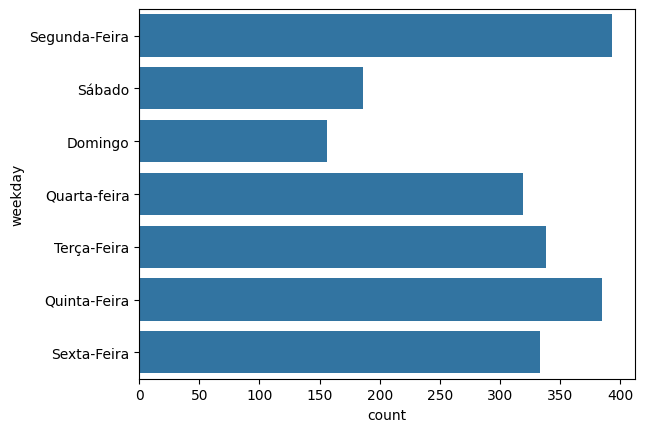

In [70]:
# Plotando o countplot
sns.countplot(df['weekday'])

*Agora que sei que segunda-feira é o dia que mais recebo e-mail, vou verificar qual é o horário que mais recebo e-mails.*

In [71]:
#Coluna hora
df['hour'] = df['date'].dt.hour

In [86]:
df['hour'].value_counts(ascending = False)

,count
hour,
9,183
12,159
10,158
14,145
15,136
13,134
11,128
17,122
16,108


<Axes: xlabel='hour', ylabel='count'>

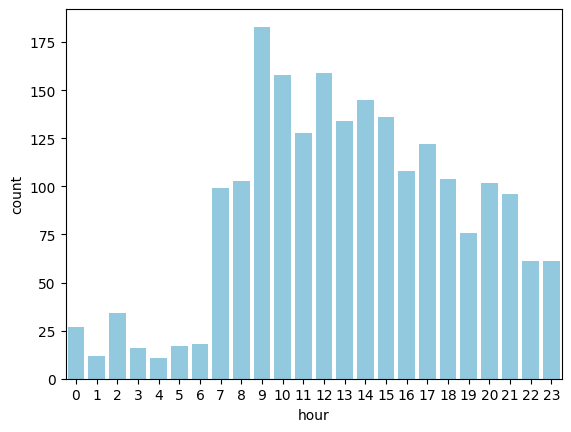

In [99]:
sns.countplot(data=df, x='hour', order=range(24), color='skyblue')

In [101]:
# Converter para formato de data que o excel aceita
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x).date())

In [102]:
df.to_excel('dados_email.xlsx', index=False)